In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

#Reading Files and Sending Date as Index
whale_returns = pd.read_csv("whale_returns.csv", index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_returns = pd.read_csv("algo_returns.csv", index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_history = pd.read_csv("sp500_history.csv", index_col='Date', parse_dates=True, infer_datetime_format=True)

#Sorting by ascending
whale_returns.sort_index(ascending=True, inplace=True)
algo_returns.sort_index(ascending=True, inplace=True)
sp500_history.sort_index(ascending=True, inplace=True)


#Cleaning Null Numbers whale_returns
whale_returns["TIGER GLOBAL MANAGEMENT LLC"].fillna(0, inplace=True)
whale_returns["SOROS FUND MANAGEMENT LLC"].fillna(0, inplace=True)
whale_returns["BERKSHIRE HATHAWAY INC"].fillna(0, inplace=True)
whale_returns["PAULSON & CO.INC. "].fillna(0, inplace=True)

#Cleaning Null Numbers algo_returns
algo_returns["Algo 2"].fillna(0, inplace= True)

#Removing "$" from sp500, renaming column, and getting percent change
sp500_history['Close'] = sp500_history['Close'].str.replace("$", "")
sp500_history['Close'] = sp500_history['Close'].astype(float)
sp500_history.rename(columns = {'Close':'SP500'}, inplace = True)
sp500_history = sp500_history.pct_change()
sp500_history.head()

#Concatting DF
combined_data = pd.concat([whale_returns, algo_returns, sp500_history], axis = "columns", join="inner")
combined_data.index = combined_data.index.normalize()
combined_data.head()


<ipython-input-48-5c03947deb54>:27: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_history['Close'] = sp500_history['Close'].str.replace("$", "")


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-02,0.000000,0.000000,0.000000,0.000000,-0.008158,0.003200,0.006125
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174


<AxesSubplot:xlabel='Date'>

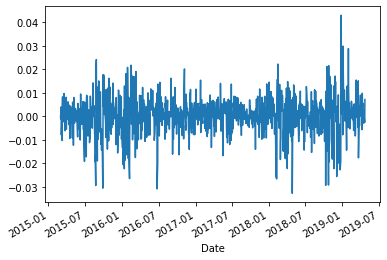

In [3]:
#ploting daily returns for SOROS FUND MANAGEMENT LLC
combined_data['SOROS FUND MANAGEMENT LLC'].plot()

<AxesSubplot:xlabel='Date'>

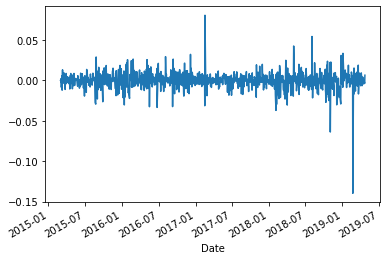

In [4]:
#ploting daily returns for TIGER GLOBAL MANAGEMENT LLC
combined_data['TIGER GLOBAL MANAGEMENT LLC'].plot()

<AxesSubplot:xlabel='Date'>

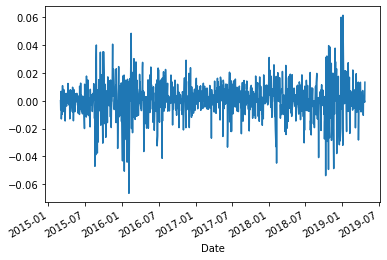

In [5]:
#ploting daily returns for BERKSHIRE HATHAWAY INC
combined_data['BERKSHIRE HATHAWAY INC'].plot()

<AxesSubplot:xlabel='Date'>

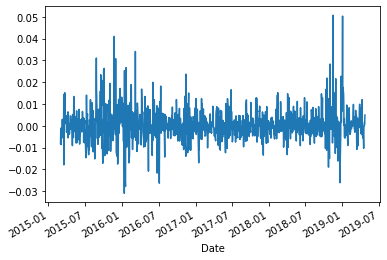

In [6]:
#ploting daily returns for Algo 1
combined_data['Algo 1'].plot()

<AxesSubplot:xlabel='Date'>

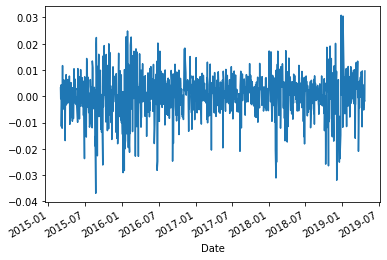

In [7]:
#ploting daily returns for Algo 2
combined_data['Algo 2'].plot()

<AxesSubplot:xlabel='Date'>

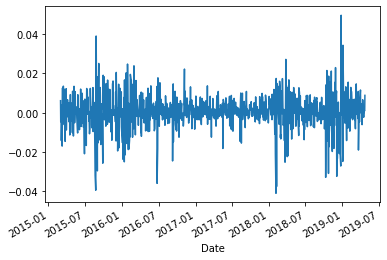

In [8]:
#ploting daily returns for S&P 500
combined_data['SP500'].plot()

<AxesSubplot:title={'center':'Portfolio Daily Returns'}, xlabel='Date'>

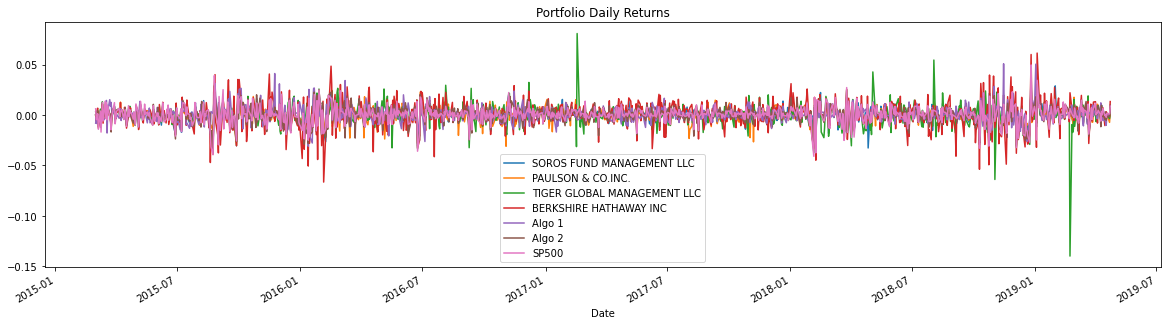

In [9]:
#ploting daily returns for all portfolios
combined_data.plot(figsize = (20,5), title="Portfolio Daily Returns")

In [10]:
#cumulative daily returns
cumulative_daily_returns = (1+ combined_data).cumprod()-1
cumulative_daily_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-02,0.000000,0.000000,0.000000,0.000000,-0.008158,0.003200,0.006125
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.010084,0.002247,0.001559
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.018586,0.004669,-0.002837
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.019524,0.009012,-0.001644
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.024384,-0.002551,-0.015795
...,...,...,...,...,...,...,...
2019-04-16,0.160965,-0.213189,-0.137920,0.526861,0.929123,0.271825,0.381354
2019-04-17,0.157602,-0.218277,-0.141721,0.531781,0.909251,0.265175,0.378213
2019-04-18,0.159278,-0.217322,-0.141222,0.534716,0.908128,0.263620,0.380390


<AxesSubplot:xlabel='Date'>

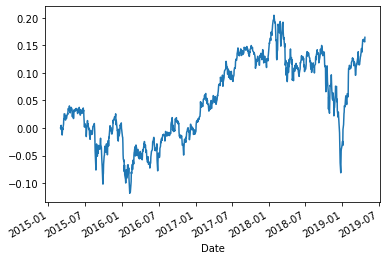

In [11]:
#Cumulative daily returns for SOROS FUND MANAGEMENT LLC
cumulative_daily_returns["SOROS FUND MANAGEMENT LLC"].plot()

<AxesSubplot:xlabel='Date'>

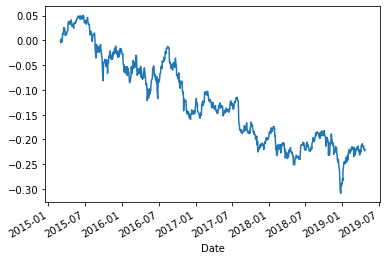

In [12]:
#Cumulative daily returns for PAULSON & CO.INC.
cumulative_daily_returns["PAULSON & CO.INC. "].plot()

<AxesSubplot:xlabel='Date'>

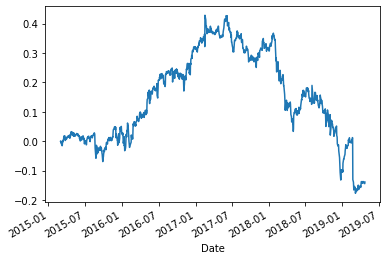

In [13]:
#Cumulative daily returns for TIGER GLOBAL MANAGEMENT LLC
cumulative_daily_returns["TIGER GLOBAL MANAGEMENT LLC"].plot()

<AxesSubplot:xlabel='Date'>

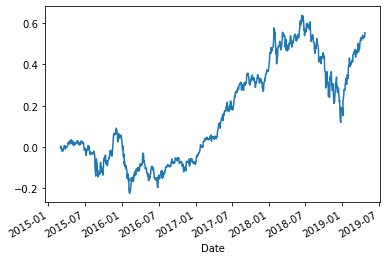

In [14]:
#Cumulative daily returns for BERKSHIRE HATHAWAY INC
cumulative_daily_returns["BERKSHIRE HATHAWAY INC"].plot()

<AxesSubplot:xlabel='Date'>

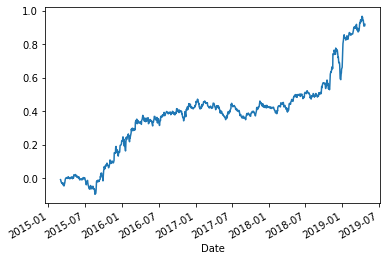

In [15]:
#Cumulative daily returns for Algo 1
cumulative_daily_returns["Algo 1"].plot()

<AxesSubplot:xlabel='Date'>

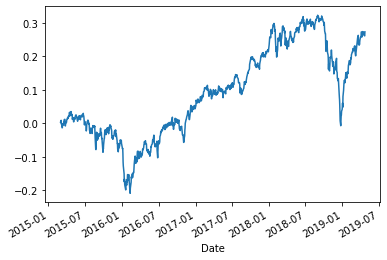

In [16]:
#Cumulative daily returns for Algo 2
cumulative_daily_returns["Algo 2"].plot()

<AxesSubplot:xlabel='Date'>

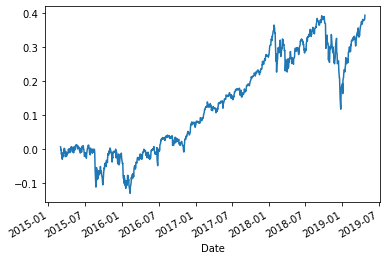

In [17]:
#Cumulative daily returns for S&P 500
cumulative_daily_returns["SP500"].plot()

<AxesSubplot:title={'center':'Portfolio Cumulative Returns'}, xlabel='Date'>

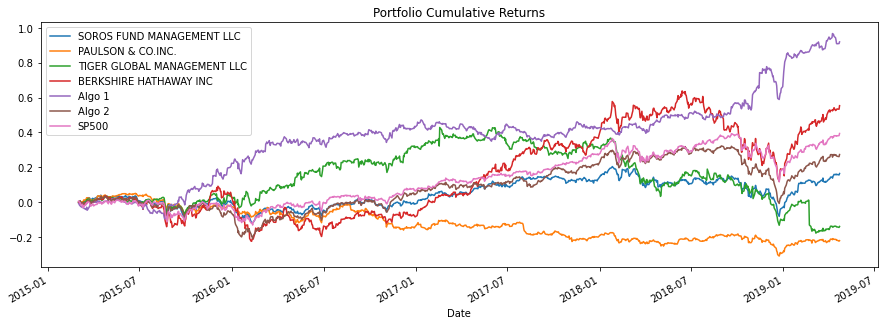

In [18]:
#Cumulative daily returns for all portfolios
cumulative_daily_returns.plot(figsize =(15,5), title="Portfolio Cumulative Returns")

In [19]:
##ALGO 1 and Berkshire Hathaway Inc Outperfromed the S&P 500

<AxesSubplot:>

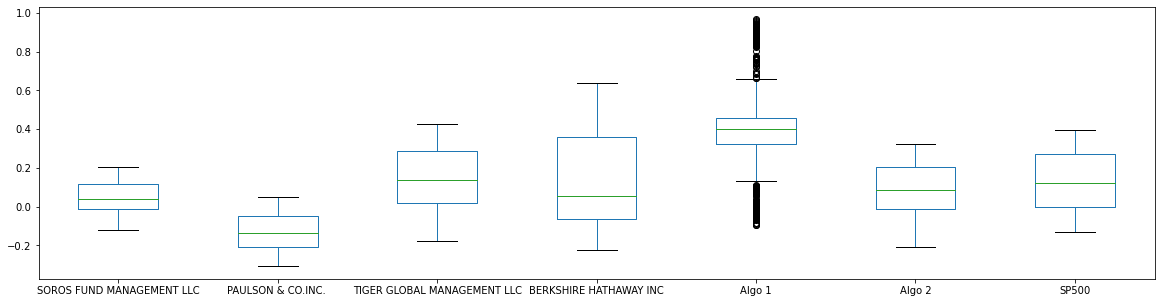

In [20]:
#Box Plot for each Portfolio
cumulative_daily_returns.plot.box(figsize = (20,5))

In [21]:
#Standard deviation
daily_std = cumulative_daily_returns.std()
daily_std = daily_std.sort_values(ascending=False)
daily_std

BERKSHIRE HATHAWAY INC         0.241509
Algo 1                         0.230581
TIGER GLOBAL MANAGEMENT LLC    0.149843
SP500                          0.145314
Algo 2                         0.132086
PAULSON & CO.INC.              0.088496
SOROS FUND MANAGEMENT LLC      0.073219
dtype: float64

Berkshire Hathaway Inc, Algo 1, and Tiger Global Managment LLC are all riskier than the S&P 500

In [23]:
#Annualized Standard Deviation
annualized_std = daily_std * np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY INC         3.833842
Algo 1                         3.660363
TIGER GLOBAL MANAGEMENT LLC    2.378677
SP500                          2.306783
Algo 2                         2.096800
PAULSON & CO.INC.              1.404828
SOROS FUND MANAGEMENT LLC      1.162320
dtype: float64

In [24]:
#Calculating the 21 day Rolling Standard Deviation
rolling_std = combined_data.rolling(window=21).std()
rolling_std

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006498
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006537
2019-04-18,0.006633,0.006303,0.007328,0.009475,0.005834,0.007172,0.006470


In [25]:
#correlation of portfolios
correlation = rolling_std.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.664714,0.452160,0.859201,0.721005,0.872911,0.911525
PAULSON & CO.INC.,0.664714,1.000000,0.408265,0.631541,0.584942,0.688525,0.597117
TIGER GLOBAL MANAGEMENT LLC,0.452160,0.408265,1.000000,0.413637,0.265375,0.359786,0.413781
BERKSHIRE HATHAWAY INC,0.859201,0.631541,0.413637,1.000000,0.793308,0.824755,0.812049
Algo 1,0.721005,0.584942,0.265375,0.793308,1.000000,0.760769,0.699708
Algo 2,0.872911,0.688525,0.359786,0.824755,0.760769,1.000000,0.901000
SP500,0.911525,0.597117,0.413781,0.812049,0.699708,0.901000,1.000000


<AxesSubplot:>

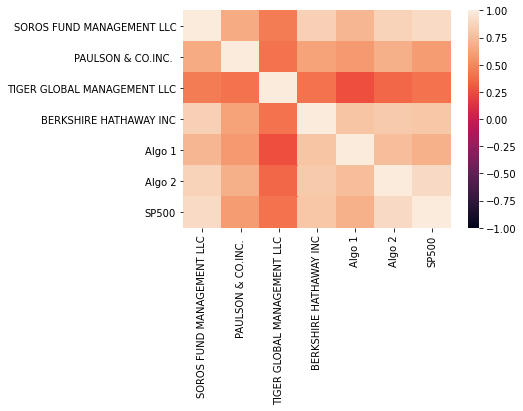

In [26]:
sns.heatmap(correlation, vmin=-1, vmax=1)

Soros Fund Management LLC and Algo 2 strongly correlate with the S&P 500

In [28]:
#Beta between Berkshire Hathaway Inc and S&P 500
covariance = combined_data['BERKSHIRE HATHAWAY INC'].cov(combined_data['SP500'])
variance = combined_data['SP500'].var()
berkshire_beta = covariance / variance
berkshire_beta

1.134255017119596

<AxesSubplot:xlabel='Date'>

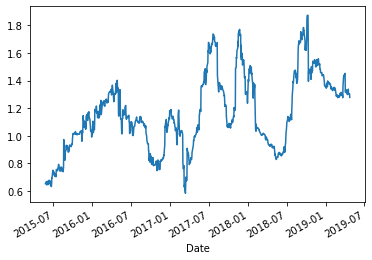

In [29]:
#Calculating 60 day rolling Beta between Berkshire Hathaway Inc and S&P 500

rolling_covariance = combined_data['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_data['SP500'])
rolling_variance = combined_data['SP500'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot()

In [30]:
#Calculating Sharpe Ratios
sharpe_ratios = ((combined_data.mean()-combined_data['SP500'].mean()) * 252) / (combined_data.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC     -0.357543
PAULSON & CO.INC.             -1.285782
TIGER GLOBAL MANAGEMENT LLC   -0.638318
BERKSHIRE HATHAWAY INC         0.185271
Algo 1                         0.621739
Algo 2                        -0.168582
SP500                          0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

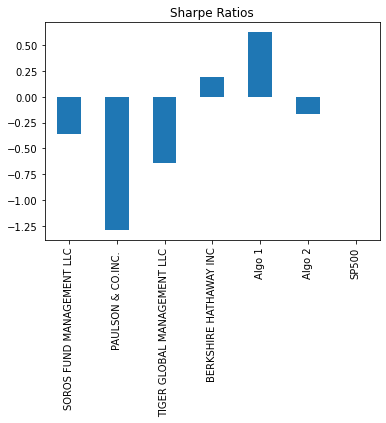

In [31]:
#Plotting Sharpe Ratios
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

Algo 1 outperforms both the S&P 500 and all other whale portfolios

In [33]:
#Importing and Cleaning my Portfolio
my_portfolio = pd.read_csv("My_Portfolio.csv", index_col='Date', parse_dates=True, infer_datetime_format=True)
my_portfolio.index = my_portfolio.index.normalize()
my_portfolio.drop(columns='Date.1', inplace=True)
my_portfolio.drop(columns='Date.2', inplace=True)
my_portfolio.rename(columns={'Close':'GOOG','Close.1':'AMZN','Close.2':'AAPL'}, inplace=True)
my_portfolio

,GOOG,AMZN,AAPL,Total Returns
Date,,,,
2015-03-02,569.78,385.66,32.27,987.71
2015-03-03,572.07,384.61,32.34,989.02
2015-03-04,571.80,382.72,32.14,986.66
2015-03-05,573.76,387.83,31.60,993.19
2015-03-06,566.13,380.09,31.65,977.87
...,...,...,...,...
2019-04-15,1221.10,1844.87,49.81,3115.78
2019-04-16,1227.13,1863.04,49.81,3139.98
2019-04-17,1236.34,1864.82,50.78,3151.94


In [34]:
#Calculating My Portfolio Daily Returns
my_portfolio_total = my_portfolio.drop(columns='GOOG')
my_portfolio_total.drop(columns='AMZN', inplace=True)
my_portfolio_total.drop(columns='AAPL', inplace=True)

my_portfolio_daily_returns=my_portfolio_total.pct_change()
my_portfolio_daily_returns.fillna(0, inplace=True)
my_portfolio_daily_returns

,Total Returns
Date,
2015-03-02,0.000000
2015-03-03,0.001326
2015-03-04,-0.002386
2015-03-05,0.006618
2015-03-06,-0.015425
...,...
2019-04-15,0.001649
2019-04-16,0.007767
2019-04-17,0.003809


In [35]:
#Calculating my annualized Standard Deviation
my_cumulative_daily_returns = (1+ my_portfolio_daily_returns).cumprod()-1
my_daily_std = my_cumulative_daily_returns.std()
my_annualized_std = my_daily_std * np.sqrt(252)
my_annualized_std

Total Returns    10.901164
dtype: float64

<AxesSubplot:xlabel='Date'>

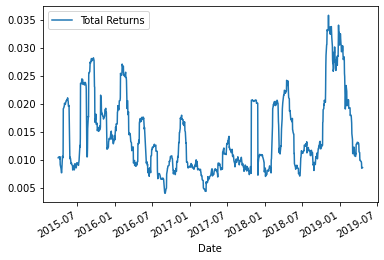

In [36]:
#Calculating and plotting 21 day rolling standard deviation for my portfolio
my_rolling_std = my_portfolio_daily_returns.rolling(window=21).std()
my_rolling_std.plot()

In [37]:
#Concatting my portfolio with all other portfolios
all_portfolios = pd.concat([combined_data, my_portfolio_daily_returns], axis = "columns", join="inner")
all_portfolios

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,Total Returns
Date,,,,,,,,
2015-03-02,0.000000,0.000000,0.000000,0.000000,-0.008158,0.003200,0.006125,0.000000
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,0.001326
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.002386
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.006618
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.015425
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000629,0.001649
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.007767
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.003809


In [50]:
#calculating all portfolios cumulative returns
all_portfolios_cumulative = (1+ all_portfolios).cumprod()-1
all_portfolios_cumulative

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,Total Returns
Date,,,,,,,,
2015-03-02,0.000000,0.000000,0.000000,0.000000,-0.008158,0.003200,0.006125,0.000000
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.010084,0.002247,0.001559,0.001326
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.018586,0.004669,-0.002837,-0.001063
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.019524,0.009012,-0.001644,0.005548
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.024384,-0.002551,-0.015795,-0.009962
...,...,...,...,...,...,...,...,...
2019-04-15,0.157839,-0.213494,-0.137203,0.525584,0.942614,0.268148,0.380651,2.154549
2019-04-16,0.160965,-0.213189,-0.137920,0.526861,0.929123,0.271825,0.381354,2.179051
2019-04-17,0.157602,-0.218277,-0.141721,0.531781,0.909251,0.265175,0.378213,2.191159


<AxesSubplot:xlabel='Date'>

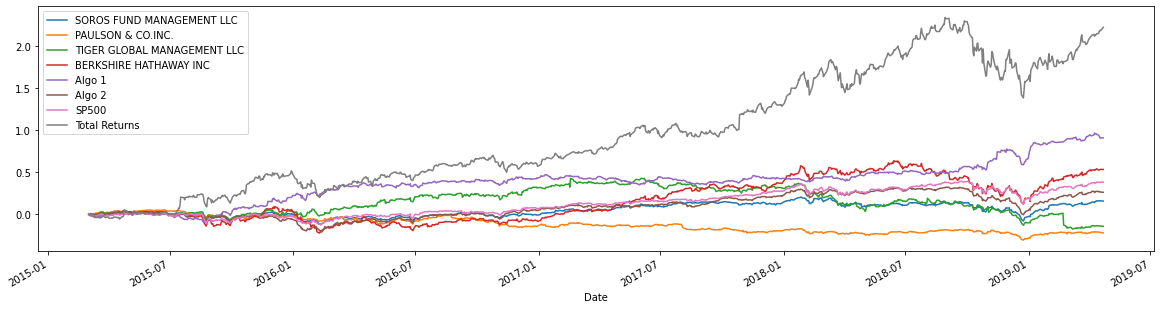

In [52]:
#plotting all cumulative returns
all_portfolios_cumulative.plot(figsize = (20,5))

In [38]:
#Correlation of all portfolios
all_portfolio_correlation = all_portfolios.corr()
all_portfolio_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,Total Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.699822,0.561040,0.754157,0.320719,0.826673,0.837533,0.610111
PAULSON & CO.INC.,0.699822,1.000000,0.434308,0.545450,0.268425,0.678054,0.669509,0.460140
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424124,0.164000,0.507133,0.623644,0.417200
BERKSHIRE HATHAWAY INC,0.754157,0.545450,0.424124,1.000000,0.291533,0.687701,0.750947,0.695074
Algo 1,0.320719,0.268425,0.164000,0.291533,1.000000,0.287258,0.278140,0.244479
Algo 2,0.826673,0.678054,0.507133,0.687701,0.287258,1.000000,0.858609,0.570919
SP500,0.837533,0.669509,0.623644,0.750947,0.278140,0.858609,1.000000,0.719768
Total Returns,0.610111,0.460140,0.417200,0.695074,0.244479,0.570919,0.719768,1.000000


<AxesSubplot:>

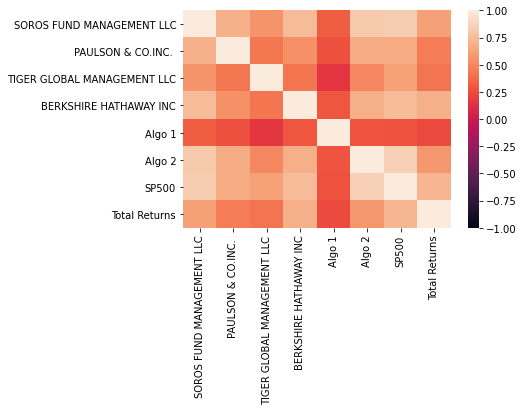

In [39]:
#Heatmap Correlation
sns.heatmap(all_portfolio_correlation, vmin=-1, vmax=1)

In [40]:
#My portfolio Beta compared to S&P 500
my_covariance = my_portfolio_daily_returns['Total Returns'].cov(combined_data['SP500'])
my_beta = my_covariance / variance
my_beta

1.2979181330386025

<AxesSubplot:xlabel='Date'>

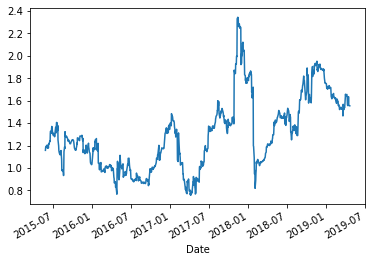

In [41]:
#My 60 Day rolling beta compared with the S&P 500
my_rolling_covariance = my_portfolio_daily_returns['Total Returns'].rolling(window=60).cov(combined_data['SP500'])
rolling_beta = my_rolling_covariance / rolling_variance
rolling_beta.plot()

In [42]:
#Sharpe ratios including my portfolio
my_sharpe_ratios = ((all_portfolios.mean()-combined_data['SP500'].mean()) * 252) / (all_portfolios.std() * np.sqrt(252))
my_sharpe_ratios

SOROS FUND MANAGEMENT LLC     -0.370986
PAULSON & CO.INC.             -1.293353
TIGER GLOBAL MANAGEMENT LLC   -0.647282
BERKSHIRE HATHAWAY INC         0.170215
Algo 1                         0.612920
Algo 2                        -0.185680
SP500                         -0.015104
Total Returns                  0.913337
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

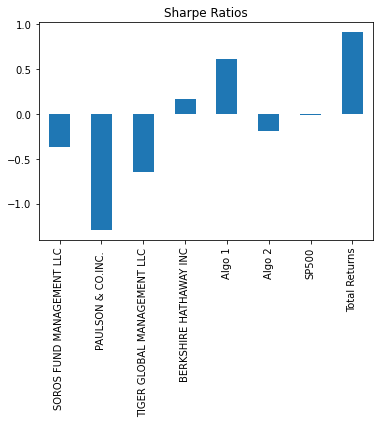

In [53]:
#plotting all sharpe ratios
my_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

My portfolio out perfroms all other portfolios in terms of cumulative returns and correlates most closely with the S&P 500.  Although my portfolio had the greatest returns it was also the most risky, having an annualized standard deviation of 10.901164, which was well above any other portfolio.  My portfolio also has a beta of 1.2979181330386025, indicating that although it is a risky portfolio it has potential to provide a higher return.  Even though my potfolio is riskier than others it had a higher sharpe ratio determining my portfolio generated a higher return on a risk-adjusted basis.